In [1]:
import importlib
import sys
import pickle
import numpy as np

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')
sys.path.insert(0, '../../../..')
sys.path.insert(0, '../../../../..')
sys.path.insert(0, '../../../../../..')
sys.path.insert(0, '../../../../../../..')


In [2]:
import src.evaluation_metrics.conduct_evaluation
importlib.reload(src.evaluation_metrics.conduct_evaluation)

import src.evaluation_metrics.metrics
importlib.reload(src.evaluation_metrics.metrics)

<module 'src.evaluation_metrics.metrics' from '/home/LordKunkler/probabilistic_suffix_prediction_lab/probabilistic_suffix_prediction_dev/src/reimplemented_comparable_approaches/weytjens_unc_rem_time/notebooks/evaluation/Helpdesk/../../../../../../src/evaluation_metrics/metrics.py'>

In [3]:
import src.evaluation_metrics.plots
importlib.reload(src.evaluation_metrics.plots)

output_dirs = ['../../../../../../../../data/Helpdesk/eval_weytjens_sl5/']

all_results = dict()

for output_dir in output_dirs:
    evaluation_metrics = {

        'RemainingTime_LastEvent_Mean2_Var_seconds_outliers' : src.evaluation_metrics.metrics.LastValueMean2VarMAE('case_elapsed_time', percentile=0.25, value_factor= 3600*24),
        
        'RemainingTime_PIT' : src.evaluation_metrics.metrics.LastValuePIT('case_elapsed_time'),

        'LastValueInterval_50' : src.evaluation_metrics.metrics.LastValueInterval('case_elapsed_time', percentile=0.50),
        'LastValueInterval_75' : src.evaluation_metrics.metrics.LastValueInterval('case_elapsed_time', percentile=0.75),
        'LastValueInterval_90' : src.evaluation_metrics.metrics.LastValueInterval('case_elapsed_time', percentile=0.90),
        'LastValueInterval_95' : src.evaluation_metrics.metrics.LastValueInterval('case_elapsed_time', percentile=0.95),
        'LastValueInterval_99' : src.evaluation_metrics.metrics.LastValueInterval('case_elapsed_time', percentile=0.99),
    }

    res_raw, c = src.evaluation_metrics.conduct_evaluation.batch_evaluate(output_dir, evaluation_metrics)
    #res_raw, c = src.evaluation_metrics.conduct_evaluation.evaluate_sequentially(output_dir, evaluation_metrics)
    all_results[output_dir] = (res_raw, c)

with open("Helpdesk_eval.pkl", "wb") as file:
    pickle.dump(all_results, file)

Loaded: results_part_050.pklLoaded: results_part_1000.pklLoaded: results_part_100.pkl


Loaded: results_part_1050.pkl
Loaded: results_part_1150.pkl
Loaded: results_part_1100.pkl
Loaded: results_part_1200.pkl
Loaded: results_part_1250.pkl
Loaded: results_part_1300.pkl
Loaded: results_part_1350.pkl
Loaded: results_part_1400.pkl
Loaded: results_part_1450.pkl
Loaded: results_part_150.pkl
Loaded: results_part_1500.pkl
Loaded: results_part_1550.pkl
Loaded: results_part_1600.pkl
Loaded: results_part_1650.pkl
Loaded: results_part_1800.pkl
Loaded: results_part_1700.pklLoaded: results_part_1750.pkl

Loaded: results_part_1946.pklLoaded: results_part_1900.pkl

Loaded: results_part_200.pkl
Loaded: results_part_1850.pkl
Loaded: results_part_300.pklLoaded: results_part_250.pkl

Loaded: results_part_350.pkl
Loaded: results_part_400.pkl
Loaded: results_part_450.pkl
Loaded: results_part_500.pkl
Loaded: results_part_550.pkl
Loaded: results_part_600.pkl
Loaded: results_part_650.pkl
Loaded: results_part_70

dict_keys(['RemainingTime_LastEvent_Mean2_Var_seconds_outliers', 'RemainingTime_PIT', 'LastValueInterval_50', 'LastValueInterval_75', 'LastValueInterval_90', 'LastValueInterval_95', 'LastValueInterval_99'])
7
1
1
dict_keys([('RemainingTime_LastEvent_Mean2_Var_seconds_outliers', 'Rem. time (last case) MAE (days) ')])


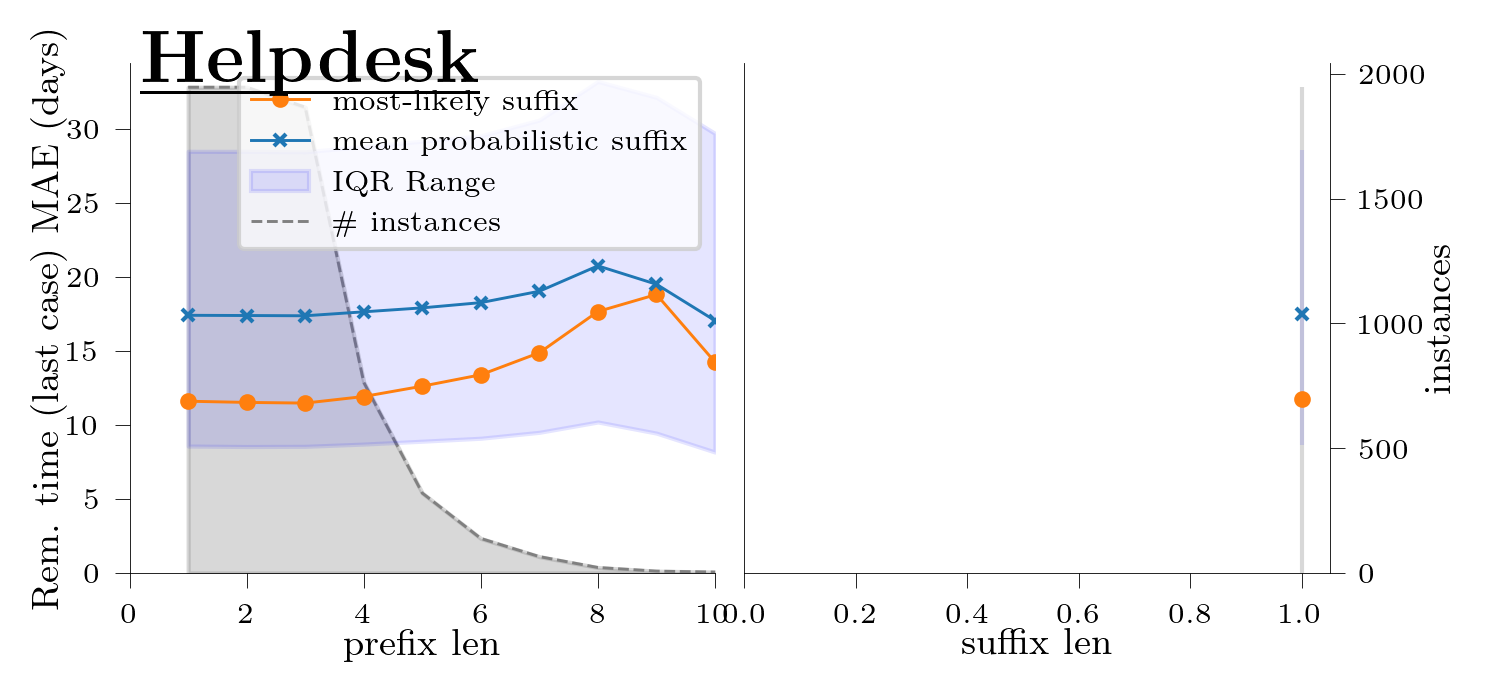

In [4]:
with open("Helpdesk_eval.pkl", "rb") as file:
    all_results = pickle.load(file)

import src.evaluation_metrics.plots
importlib.reload(src.evaluation_metrics.plots)

res_raw, c = all_results['../../../../../../../../data/Helpdesk/eval_weytjens_sl5/']

keys_to_keep = [
                ('RemainingTime_LastEvent_Mean2_Var_seconds_outliers', 'Rem. time (last case) MAE (days) '),
]

res = {(k, label) : res_raw[k] for k, label in keys_to_keep}
print(res_raw.keys())
print(len(res_raw.keys()))
print(len(res.keys()))
print(len(keys_to_keep))
print(res.keys())
p = src.evaluation_metrics.plots.plot_res(res, c, columns=2, caption='Helpdesk', pgf=True)#int(len(keys_to_keep)))
with open('Helpdesk.pgf', 'wb') as f:
    f.write(p)

In [5]:
print('Mean MAE last event:')
print(np.mean([i['mean'] for i in res_raw['RemainingTime_LastEvent_Mean2_Var_seconds_outliers'].values()]))
print('Probabilistic MAE last event:')
print(np.mean([i['prob'][0] for i in res_raw['RemainingTime_LastEvent_Mean2_Var_seconds_outliers'].values()]))

Mean MAE last event:
11.726717284713644
Probabilistic MAE last event:
17.496604866347152


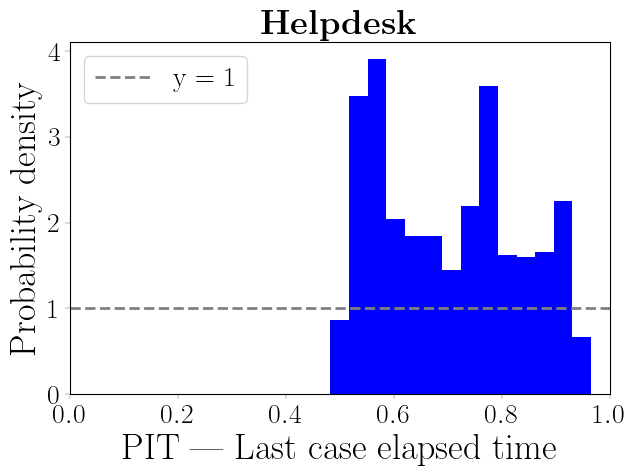

In [6]:
import src.evaluation_metrics.plots
importlib.reload(src.evaluation_metrics.plots)

with open('Helpdesk_PIT_remaining_time.pgf', 'wb') as f:
    r = src.evaluation_metrics.plots.plot_pits(res_raw['RemainingTime_PIT'], caption='Helpdesk', x_label='Last case elapsed time', pgf=True)
    f.write(r)

In [7]:
with open("Helpdesk_eval.pkl", "rb") as file:
    all_results = pickle.load(file)

import src.evaluation_metrics.plots
importlib.reload(src.evaluation_metrics.plots)

res_raw, c = all_results['../../../../../../../../data/Helpdesk/eval_weytjens_sl5/']

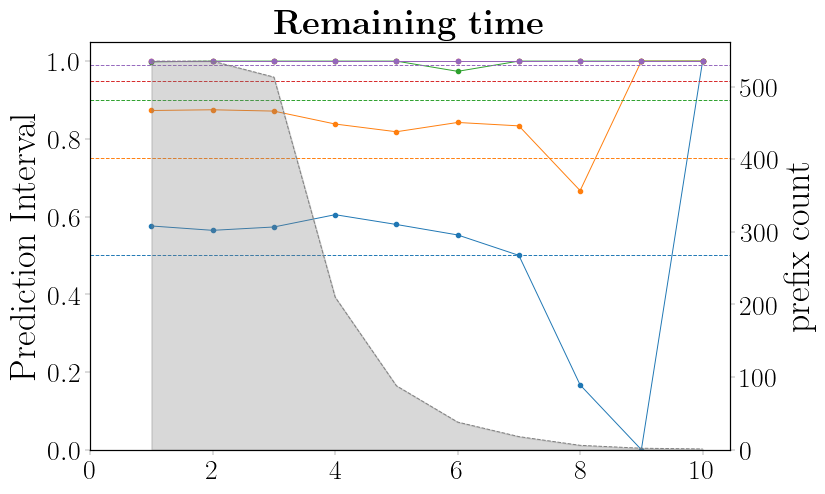

In [8]:
import src.evaluation_metrics.plots
importlib.reload(src.evaluation_metrics.plots)


keys_to_keep = [
                ('LastValueInterval_50', 'LastValueInterval_50'),
                ('LastValueInterval_75', 'LastValueInterval_75'),
                ('LastValueInterval_90', 'LastValueInterval_90'),
                ('LastValueInterval_95', 'LastValueInterval_95'),
                ('LastValueInterval_99', 'LastValueInterval_99'),
]

res = {(k, label) : res_raw[k] for k, label in keys_to_keep}


p = src.evaluation_metrics.plots.plot_intervals(res, caption='Remaining time', pgf=True) #int(len(keys_to_keep)))

with open('Helpdesk_intervals_suffix.pgf', 'wb') as f:
    f.write(p)

In [9]:
res[('LastValueInterval_50', 'LastValueInterval_50')]

{('Case 2151', 5, 1): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('Case 2151', 6, 1): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('Case 2159', 1, 1): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('Case 2159', 2, 1): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('Case 2159', 3, 1): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('Case 2159', 4, 1): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('Case 2159', 5, 1): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('Case 2166', 1, 1): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('Case 2166', 2, 1): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('Case 2166', 3, 1): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('Case 2166', 4, 1): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('Case 2166', 5, 1): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('Case 217', 1, 1): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('Case 217', 2, 1): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('Case 217', 3, 1): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('Case 2172', 1, 1): {'mean': 0, 'prob': (np.True_, (0, 0